# Importing required Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Loading Train Data

In [2]:
import pandas as pd

df=pd.read_csv('train_agriculture.csv')
df=pd.DataFrame(df)
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [3]:
df['Crop_Damage'].unique()   #Crop_Damage is the target variable

array([0, 1, 2], dtype=int64)

It has three unique values

0 -> Alive

1 -> Damaged due to other causes

2 -> Damaged due to Pesticides

In [4]:
df.shape

(4599, 10)

In [5]:
df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [6]:
df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

Pesticide_Use_Category

0 -> Never

1 -> Previously Used

2 -> Currently Using

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


# EDA Process

In [8]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4157.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.586005,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


There is some differences between 75% and max in Number_Doses_Week, Number_Weeks_Used, Number_Weeks_Quit. So Outliers might have present.

# Checking Null Values

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df.isnull()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
4594,False,False,False,False,False,False,True,False,False,False
4595,False,False,False,False,False,False,False,False,False,False
4596,False,False,False,False,False,False,False,False,False,False
4597,False,False,False,False,False,False,False,False,False,False


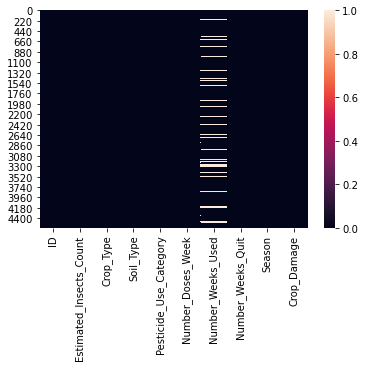

In [11]:
sns.heatmap(df.isnull())

In [12]:
df.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

Number_Weeks_Used has many null values. It is needed to be filled up.

In [13]:
df.fillna(df['Number_Weeks_Used'].median(),axis=1,inplace=True)
df

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,28.0,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


# Univariate Analysis

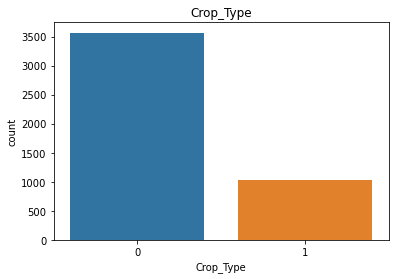

In [20]:
sns.countplot(x='Crop_Type',data=df)
plt.title('Crop_Type')
plt.show()

Observation:

Most of the data is Crop_Type 0.

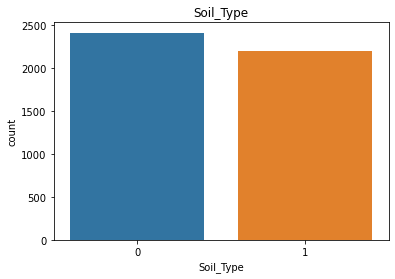

In [21]:
sns.countplot(x='Soil_Type',data=df)
plt.title('Soil_Type')
plt.show()

Observation:

Datas are both Soil_Type and Crop_Type

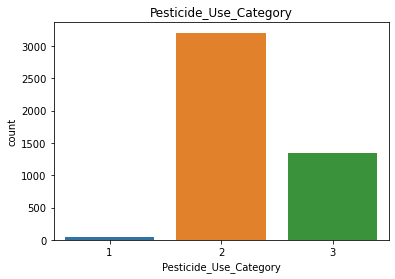

In [16]:
sns.countplot(x='Pesticide_Use_Category',data=df)
plt.title('Pesticide_Use_Category')
plt.show()

Observation:

Category 2 of Pesticide means previously used Pesticides are mostly used.

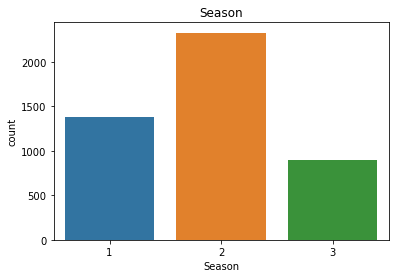

In [18]:
sns.countplot(x='Season',data=df)
plt.title('Season')
plt.show()

Observation:

Category 2 of Season is used in the dataset.

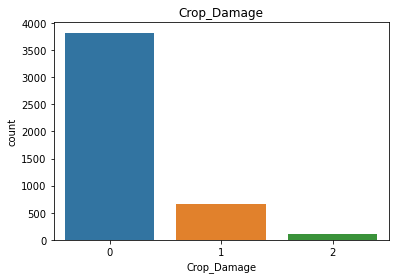

In [19]:
sns.countplot(x='Crop_Damage',data=df)
plt.title('Crop_Damage')
plt.show()

Observation:

Most of crops in dataset is 0 category type means alive.

# Bivariate Analysis

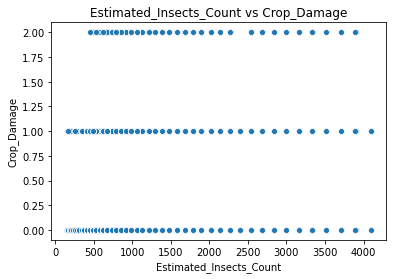

In [22]:
sns.scatterplot(x=df['Estimated_Insects_Count'],y=df['Crop_Damage'],data=df)
plt.title('Estimated_Insects_Count vs Crop_Damage')
plt.show()

Observation:

Relationship between Estimated Insects Count and Crop Damage is not that much correlated.

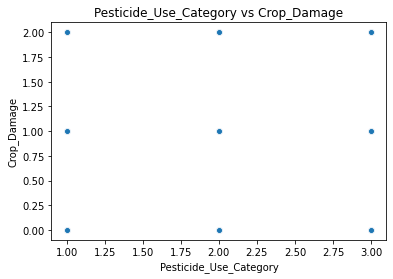

In [25]:
sns.scatterplot(x=df['Pesticide_Use_Category'],y=df['Crop_Damage'],data=df)
plt.title('Pesticide_Use_Category vs Crop_Damage')
plt.show()

Observation:

All cases of Pesticide use Crop is damaged.

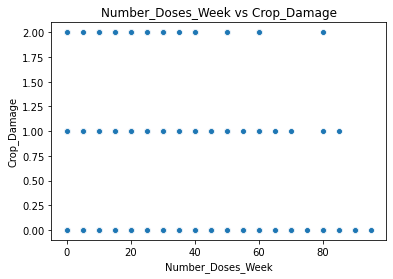

In [26]:
sns.scatterplot(x=df['Number_Doses_Week'],y=df['Crop_Damage'],data=df)
plt.title('Number_Doses_Week vs Crop_Damage')
plt.show()

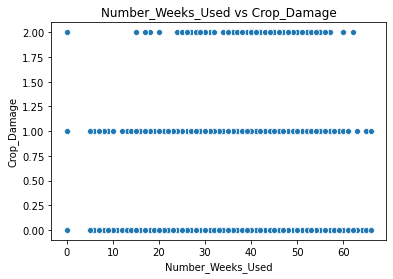

In [27]:
sns.scatterplot(x=df['Number_Weeks_Used'],y=df['Crop_Damage'],data=df)
plt.title('Number_Weeks_Used vs Crop_Damage')
plt.show()

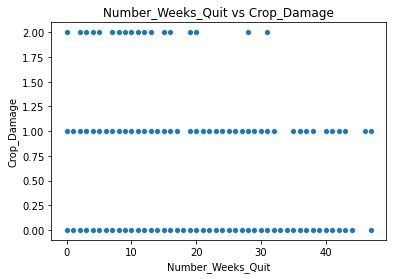

In [28]:
sns.scatterplot(x=df['Number_Weeks_Quit'],y=df['Crop_Damage'],data=df)
plt.title('Number_Weeks_Quit vs Crop_Damage')
plt.show()

Observation:

The Weeks Used,quit etc are not uniformly correlated to Crop_Damage.

# Multivariate Analysis

# Correlation

In [32]:
dfcorr=df.corr()
dfcorr

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.428238,0.246719,-0.009482,0.202312
Crop_Type,-0.036911,1.000000,-0.175019,0.349662,-0.163832,-0.002036,-0.273475,-0.000549,0.021772
Soil_Type,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.093690,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.027111,0.349662,0.021661,1.000000,-0.005985,0.367823,-0.569467,0.008487,0.199195
Number_Doses_Week,-0.122509,-0.163832,0.050099,-0.005985,1.000000,0.099903,-0.032381,-0.003768,-0.018363
Number_Weeks_Used,0.428238,-0.002036,-0.093690,0.367823,0.099903,1.000000,-0.445483,-0.010814,0.231439
Number_Weeks_Quit,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,-0.445483,1.000000,0.004861,-0.152918
Season,-0.009482,-0.000549,0.011052,0.008487,-0.003768,-0.010814,0.004861,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.231439,-0.152918,-0.016196,1.000000


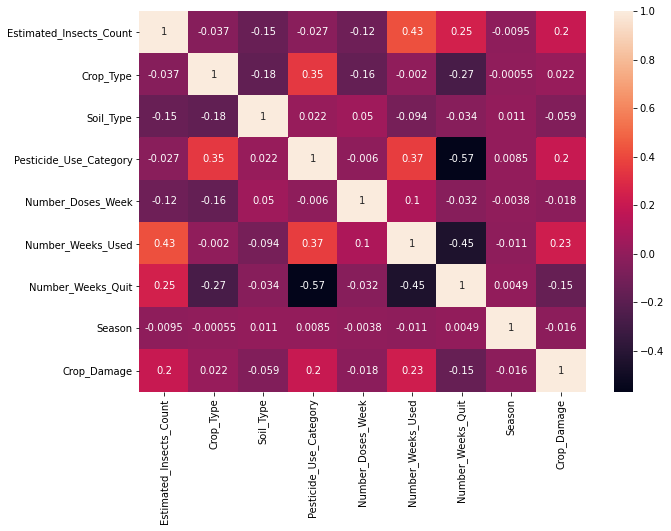

In [33]:
plt.figure(figsize=(10,7))
sns.heatmap(dfcorr,annot=True)

Crop_Damage is positively correlated with Insects Count,Pestcides Use Category,Number of Weeks used and negatively correlated with Number of weeks quit.

In [34]:
df.drop(['ID'],axis=1,inplace=True)    #dropping ID column which cant be correlated with anyone
df

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...
4594,2138,0,1,2,20,28.0,1,1,1
4595,2139,0,1,2,30,47.0,2,1,1
4596,2267,0,1,2,10,7.0,27,2,0
4597,2267,0,1,2,10,20.0,24,2,0


# Checking Outliers

In [35]:
df.shape

(4599, 9)

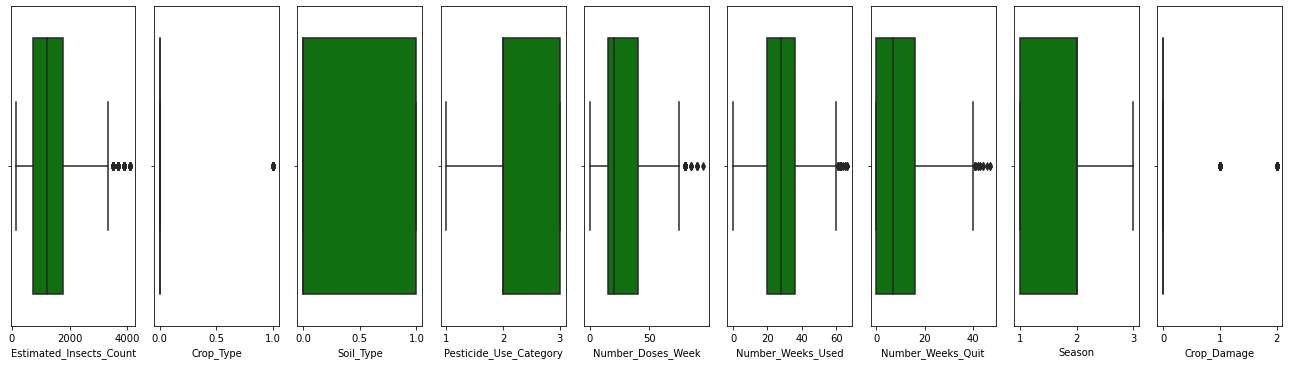

In [36]:
collist=df.columns.values
ncol=10
nrows=10

plt.figure(figsize=(2*ncol,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='h')
    plt.tight_layout()

There is some outliers in Estimated_Insects_Count,Number_Doses_Week, Number_Weeks_Used, Number_Weeks_Quit and Crop_Damage

# Removal of Outliers

Z Score Method

In [37]:
import scipy
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
new_df=df[(z<3).all(axis=1)]

new_df

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...
4594,2138,0,1,2,20,28.0,1,1,1
4595,2139,0,1,2,30,47.0,2,1,1
4596,2267,0,1,2,10,7.0,27,2,0
4597,2267,0,1,2,10,20.0,24,2,0


In [38]:
df.shape

(4599, 9)

In [39]:
new_df.shape

(4370, 9)

Percentage loss in data while removing outliers

In [40]:
P=(4599-4370)*100/4599
P

4.9793433355077195

In [41]:
new_df['Crop_Damage'].unique()

array([0, 1], dtype=int64)

4.98% is ok for removing outliers from dataset but Target variable losses one value. Thats why Outliers wont be removed.

# Checking Skewness

In [42]:
df.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.299898
Number_Weeks_Quit          0.919771
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

There are some skewness.

In [43]:
list2=['Estimated_Insects_Count','Crop_Type','Number_Doses_Week','Number_Weeks_Quit']
for v in list2:
    df[v]=np.cbrt(df[v])
    
df.skew()

Estimated_Insects_Count    0.020932
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week         -0.745158
Number_Weeks_Used          0.299898
Number_Weeks_Quit         -0.274154
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

# Preparing Input and Target Variables for Model Training

In [45]:
x=df.drop(['Crop_Damage'],axis=1)
x

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,5.728654,1.0,0,1,0.000000,0.0,0.000000,1
1,5.934472,1.0,0,1,0.000000,0.0,0.000000,2
2,6.357861,1.0,0,1,0.000000,0.0,0.000000,2
3,6.357861,1.0,1,1,0.000000,0.0,0.000000,2
4,6.993191,1.0,0,1,0.000000,0.0,0.000000,2
...,...,...,...,...,...,...,...,...
4594,12.882572,0.0,1,2,2.714418,28.0,1.000000,1
4595,12.884580,0.0,1,2,3.107233,47.0,1.259921,1
4596,13.136626,0.0,1,2,2.154435,7.0,3.000000,2
4597,13.136626,0.0,1,2,2.154435,20.0,2.884499,2


In [46]:
y=pd.DataFrame(df['Crop_Damage'])
y

,Crop_Damage
0,0
1,1
2,1
3,1
4,1
...,...
4594,1
4595,1
4596,0
4597,0


# Scaling the Input Data

In [47]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_x=scaler.fit_transform(x)
scaled_x

array([[-2.19358497,  1.85681868, -0.95429408, ..., -2.40699531,
        -1.31338121, -1.28702725],
       [-2.10157906,  1.85681868, -0.95429408, ..., -2.40699531,
        -1.31338121,  0.15207762],
       [-1.91231316,  1.85681868, -0.95429408, ..., -2.40699531,
        -1.31338121,  0.15207762],
       ...,
       [ 1.11797084, -0.53855555,  1.04789501, ..., -1.82207125,
         1.27779497,  0.15207762],
       [ 1.11797084, -0.53855555,  1.04789501, ..., -0.7357837 ,
         1.17803394,  0.15207762],
       [ 1.11797084, -0.53855555,  1.04789501, ...,  0.35050384,
         0.90749999,  0.15207762]])

# The Target Variable is discrete and has three unique values so this model will be a Classification Type 

# Finding Best Random State

In [48]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
best_r_state=0
accu=0

for i in range(30,200):
    train_x,test_x,train_y,test_y=train_test_split(scaled_x,y,test_size=0.30,random_state=i)
    mod=LogisticRegression()
    mod.fit(train_x,train_y)
    pred_y=mod.predict(test_x)
    tempaccu=r2_score(test_y,pred_y)
    if tempaccu>accu:
        accu=tempaccu
        best_r_state=i

print(f"Best random_state {best_r_state}")

Best random_state 0


# Multiple Algorithms

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

train_x,test_x,train_y,test_y=train_test_split(scaled_x,y,test_size=0.30,random_state=0)
modelclf=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),SVC(),
          RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]

for mc in modelclf:
    mc.fit(train_x,train_y)
    mc_y=mc.predict(test_x)
    print("Accuracy Score of",mc,"is",accuracy_score(test_y,mc_y))
    print("Confusion Matrix\n",confusion_matrix(test_y,mc_y))
    print("Classification Report\n", classification_report(test_y,mc_y))
    print("*******************************************************************")
    print("\n\n")

Accuracy Score of LogisticRegression() is 0.8318840579710145
Confusion Matrix
 [[1134   12    0]
 [ 190   14    0]
 [  28    2    0]]
Classification Report
               precision    recall  f1-score   support

           0       0.84      0.99      0.91      1146
           1       0.50      0.07      0.12       204
           2       0.00      0.00      0.00        30

    accuracy                           0.83      1380
   macro avg       0.45      0.35      0.34      1380
weighted avg       0.77      0.83      0.77      1380

*******************************************************************



Accuracy Score of KNeighborsClassifier() is 0.8115942028985508
Confusion Matrix
 [[1078   67    1]
 [ 162   42    0]
 [  18   12    0]]
Classification Report
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1146
           1       0.35      0.21      0.26       204
           2       0.00      0.00      0.00        30

    accuracy  

SVC has 83.62% accuracy.

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
mnb.score(x_train,y_train)
mnb_y=mnb.predict(x_test)

print("Accuracy Score of SVC is",accuracy_score(y_test,mnb_y))
print("Confusion Matrix\n",confusion_matrix(y_test,mnb_y))
print("Classification Report\n", classification_report(y_test,mnb_y))

Accuracy Score of SVC is 0.8246376811594203
Confusion Matrix
 [[1093   53    0]
 [ 159   45    0]
 [  24    6    0]]
Classification Report
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      1146
           1       0.43      0.22      0.29       204
           2       0.00      0.00      0.00        30

    accuracy                           0.82      1380
   macro avg       0.43      0.39      0.40      1380
weighted avg       0.78      0.82      0.79      1380



# GridSearchCV

Hypertuning SVC using GridSearchCV.

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc=SVC()
parameters={'kernel':['linear','rbf','poly'],'C':[1,10]}
clf=GridSearchCV(svc,parameters)
clf.fit(scaled_x,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ['linear', 'rbf', 'poly']})

In [52]:
print(clf.best_params_)

{'C': 1, 'kernel': 'poly'}


These are the parameters that will be fed to SVR to create a best model.

# Support Vector Machine

In [53]:
svc=SVC(kernel='poly',C=1,probability=True) #parameters given from GridSearchCV method.
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
svc_y=svc.predict(test_x)

print("Accuracy Score of SVC is",accuracy_score(test_y,svc_y))
print("Confusion Matrix\n",confusion_matrix(test_y,svc_y))
print("Classification Report\n", classification_report(test_y,svc_y))

Accuracy Score of SVC is 0.8355072463768116
Confusion Matrix
 [[1144    2    0]
 [ 194    9    1]
 [  28    2    0]]
Classification Report
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1146
           1       0.69      0.04      0.08       204
           2       0.00      0.00      0.00        30

    accuracy                           0.84      1380
   macro avg       0.51      0.35      0.33      1380
weighted avg       0.80      0.84      0.77      1380



After Hypertuning SVC model accuracy is almost same as previous ie 83%.

# CROSS VALIDATION

In [54]:
from sklearn.model_selection import cross_val_score
for m in modelclf:
    mscores=cross_val_score(m,scaled_x,y,cv=5)
    print("Scores of",m,"is",mscores)
    print("Mean Score of",m,"is",mscores.mean(),"\nStandard Deviation is",mscores.std())
    print("****************************************************************************\n\n")

Scores of LogisticRegression() is [0.78695652 0.83043478 0.83152174 0.81956522 0.83351469]
Mean Score of LogisticRegression() is 0.820398590149974 
Standard Deviation is 0.017410043791997995
****************************************************************************


Scores of KNeighborsClassifier() is [0.76521739 0.81195652 0.80434783 0.80108696 0.8226333 ]
Mean Score of KNeighborsClassifier() is 0.8010483985428396 
Standard Deviation is 0.01938888230048554
****************************************************************************


Scores of DecisionTreeClassifier() is [0.63913043 0.74347826 0.72391304 0.68913043 0.75516866]
Mean Score of DecisionTreeClassifier() is 0.7101641671003454 
Standard Deviation is 0.04198207710838636
****************************************************************************


Scores of SVC() is [0.825      0.83043478 0.8326087  0.83043478 0.83133841]
Mean Score of SVC() is 0.8299633344372428 
Standard Deviation is 0.002606453064008291
****************

In all algorithms the accuracy score lies between 75-82% by cross validation.

# Conclusion

SVC has the highest Accuracy of 83.55%.

# AUC_ROC Curve

In [55]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [56]:
y_pred_prob=svc.predict_proba(test_x)
y_pred_prob

array([[0.8360046 , 0.13830613, 0.02568927],
       [0.83327714, 0.14001057, 0.02671229],
       [0.8363332 , 0.13801046, 0.02565634],
       ...,
       [0.83570594, 0.13845066, 0.0258434 ],
       [0.83157166, 0.14142177, 0.02700657],
       [0.83478442, 0.13862378, 0.0265918 ]])

In [57]:
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(test_y, y_pred_prob[:,i], pos_label=i)

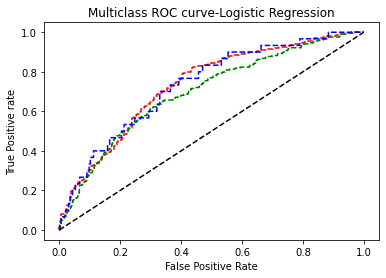

In [58]:
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve-Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.plot([0,1],[0,1],'k--')
plt.show()

AUC_ROC curve is some Area which is good to see.

# Loading Test Data

In [59]:
import pandas as pd

df_test=pd.read_csv('test_agriculture.csv')
df_test=pd.DataFrame(df_test)
df_test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [60]:
df_test.shape

(1199, 9)

In [61]:
df_test.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

There are some null values in Number_Weeks_Used column.

In [62]:
df_test.fillna(df['Number_Weeks_Used'].median(),axis=1,inplace=True) #filling null values of Test Data 
df_test

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,28.0,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1


In [63]:
df_test.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

Now Test Data has no null values.

In [64]:
df_test.drop(['ID'],axis=1,inplace=True)    #dropping ID column which cant be correlated with anyone
df_test

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,1,1,0,28.0,0,2
1,410,1,1,1,0,0.0,0,2
2,626,1,0,1,0,0.0,0,2
3,731,1,0,1,0,0.0,0,2
4,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...
1194,1132,0,1,2,40,34.0,7,3
1195,1132,0,1,2,40,25.0,3,1
1196,1132,0,1,2,20,13.0,23,1
1197,1212,0,1,2,10,35.0,5,1


# Scaling Test Data

In [66]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_df_test=scaler.fit_transform(df_test)
scaled_df_test

array([[-1.30318366,  2.03615391,  1.09360445, ..., -0.07673638,
        -0.7960038 ,  0.17280413],
       [-1.04035366,  2.03615391,  1.09360445, ..., -2.38515371,
        -0.7960038 ,  0.17280413],
       [-0.78462718,  2.03615391, -0.9144074 , ..., -2.38515371,
        -0.7960038 ,  0.17280413],
       ...,
       [-0.18556423, -0.49112201,  1.09360445, ..., -1.31338852,
         1.79995135, -1.28629553],
       [-0.09085072, -0.49112201,  1.09360445, ...,  0.50036795,
        -0.23166572, -1.28629553],
       [-0.09085072, -0.49112201,  1.09360445, ..., -0.07673638,
         1.4613485 ,  1.63190379]])

# Using The Best model SVC to predict Test data

In [67]:
svc_df_test_y=svc.predict(scaled_df_test)
svc_df_test_y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Saving the Model

In [68]:
import pickle

filename='Agriculture_svc.pkl'
pickle.dump(svc,open(filename,'wb'))

loaded_model=pickle.load(open(filename,'rb'))

loaded_model.predict(scaled_df_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)